In [2]:
import pickle 
from sequence import * 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
class_1_in = open('../notebooks/class_1_swissprot_annots', 'rb')
class_1_annots = pickle.load(class_1_in)
class_1_in.close()

class_2_in = open('../notebooks/class_2_swissprot_annots', 'rb')
class_2_annots = pickle.load(class_2_in)
class_2_in.close()


class_1_seqs = readFastaFile('../datasets/kari_ec_1_1_1_86_ec_1_1_1_382_ec_1_1_1_383_swissprot/subsets/classI_kari/kari_ec_1_1_1_86_ec_1_1_1_382_ec_1_1_1_383_swissprot_classI_kari.fasta')
class_2_seqs = readFastaFile('../datasets/kari_ec_1_1_1_86_ec_1_1_1_382_ec_1_1_1_383_swissprot/subsets/classII_kari/kari_ec_1_1_1_86_ec_1_1_1_382_ec_1_1_1_383_swissprot_classII_kari.fasta')


# Plotting metal residues in Class II

In [4]:

def sort_class_2_residues(sequences, annots):
    
    c1_starts = []
    c1_ends = []
    
    c2_starts = []
    c2_ends = []
    
    mg_c1 = []
    mg_c2 = []
    substrates = []

    for seq in sequences:
        
        ##################### 
        # C1 TERMINUS 
        #####################
       
        c1_range= annots[seq.name][0]['KARI C-terminal knotted 1'][0].split('..')
        
        c1_start = int(c1_range[0])
        c1_starts.append(c1_start)
        
        c1_end = int(c1_range[1])
        c1_ends.append(c1_end)
        
        ##################### 
        # C2 TERMINUS 
        #####################

        c2_range= annots[seq.name][0]['KARI C-terminal knotted 2'][0].split('..')
    
        c2_start = int(c2_range[0])
        c2_starts.append(c2_start)

        if c2_range[1][0] == '>': c2_end = int(c2_range[1][1:])
        else: c2_end = int(c2_range[1])
        c2_ends.append(c2_end)
       
        #######################
        # IDENTIFY METAL RESIDUES
        #######################

        for res in annots[seq.name][1]['Mg(2+)']:

            res = int(res)
            
            if res >= c1_start and res <= c1_end:
                mg_c1.append(res)
            
            elif res >= c2_start and res <= c2_end:
                mg_c2.append(res)
        
        if 'substrate' in annots[seq.name][1].keys():
            substrates.append(int(annots[seq.name][1]['substrate'][0]))

    return mg_c1, mg_c2, substrates, c1_starts, c1_ends, c2_starts, c2_ends
        
        


mg_c1, mg_c2, substrates, c1_starts, c1_ends, c2_starts, c2_ends = sort_class_2_residues(class_2_seqs, class_2_annots)


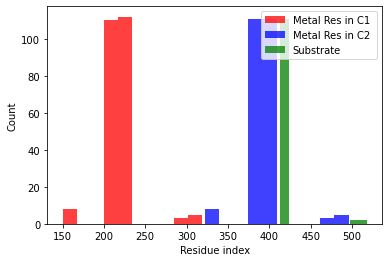

In [24]:
c1s = np.array(mg_c1)
c2s = np.array(mg_c2)
subs = np.array(substrates)

c1s_ranges = [x for x in range(min(c1_starts), max(c1_ends))]
c2s_ranges = [x for x in range(min(c2_starts), max(c2_ends))]

#ins=np.arange(min(c1s), max(c1s), 10)
plt.hist(c1s,label='Metal Res in C1', color='Red', alpha=0.75)
plt.hist(c2s, label='Metal Res in C2 ', color='Blue', alpha=0.75)
plt.hist(subs,label='Substrate', color='green',  alpha=0.75)

#domains
#plt.hist(c1s_ranges, bins=np.arange(min(c1s_ranges), max(c1s_ranges), 5), label='C1 range', color='#c700ff', alpha=0.5)
#plt.hist(c2s_ranges, bins=np.arange(min(c2s_ranges), max(c2s_ranges), 5),label='C2 range', color='#fffc00', alpha=0.5)

plt.legend(loc='upper right')
plt.xlabel('Residue index')
plt.ylabel('Count')

plt.show()



# Plotting metal residues in Class I

In [6]:

def sort_class_1_residues(sequences, annots):

    mg_c1 = []
    other = []
    substrates = []

    for seq in sequences:
        
        ##################### 
        # C1 TERMINUS 
        #####################
       
        c1_range= annots[seq.name][0]['KARI C-terminal knotted'][0].split('..')
    
        c1_start = int(c1_range[0])
        c1_end = int(c1_range[1])

       
        #######################
        # IDENTIFY METAL RESIDUES
        #######################
    
        if 'Mg(2+)' in annots[seq.name][1].keys():
            for res in annots[seq.name][1]['Mg(2+)']:

                res = int(res)

                if res >= c1_start and res <= c1_end:
                    mg_c1.append(res)

                else:
                    other.append(res)
        
        if 'substrate' in annots[seq.name][1].keys():
            substrates.append(int(annots[seq.name][1]['substrate'][0]))

    return mg_c1, other, substrates
        
        


CI_c1, other ,CI_substrates = sort_class_1_residues(class_1_seqs, class_1_annots)


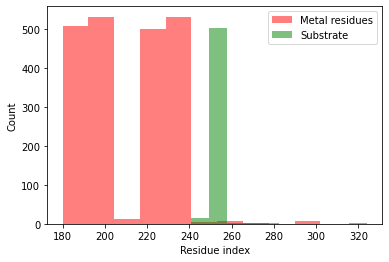

In [25]:
CI_c1s = np.array(CI_c1)
other = np.array(other)
CI_subs = np.array(CI_substrates)


plt.hist(CI_c1s, label='Metal residues', color='Red', alpha=0.5)
plt.hist(CI_subs,label='Substrate', color='Green',  alpha=0.5)
plt.legend(loc='upper right')
plt.xlabel('Residue index')
plt.ylabel('Count')
plt.show()



In [33]:


##### UNREVIEWED #####

unreviewed_c1_bit_scores = []

unreviewed_c1 = open('../datasets/kari_ec_1_1_1_86_ec_1_1_1_382_ec_1_1_1_383_unreviewed/subsets/classII_kari/c1_results.txt','r')
for line in unreviewed_c1:
    if line[0] != "#":
    
        data = line.split()
        unreviewed_c1_bit_scores.append(float(data[7]))

unreviewed_c1.close()


unreviewed_c2_bit_scores = []

unreviewed_c2 = open('../datasets/kari_ec_1_1_1_86_ec_1_1_1_382_ec_1_1_1_383_unreviewed/subsets/classII_kari/c2_results.txt','r')
for line in unreviewed_c2:
    if line[0] != "#":
    
        data = line.split()
        unreviewed_c2_bit_scores.append(float(data[7]))

unreviewed_c2.close()


##### SWISSPROT #####

swiss_c1_bit_scores = []

swiss_c1 = open('../datasets/kari_ec_1_1_1_86_ec_1_1_1_382_ec_1_1_1_383_swissprot/subsets/classII_kari/class_2_c1.txt','r')
for line in swiss_c1:
    if line[0] != "#":
    
        data = line.split()
        swiss_c1_bit_scores.append(float(data[7]))

swiss_c1.close()


swiss_c2_bit_scores = []

swiss_c2 = open('../datasets/kari_ec_1_1_1_86_ec_1_1_1_382_ec_1_1_1_383_swissprot/subsets/classII_kari/class_2_c2.txt','r')
for line in swiss_c2:
    if line[0] != "#":
    
        data = line.split()
        swiss_c2_bit_scores.append(float(data[7]))

swiss_c2.close()


print(np.mean(unreviewed_c1_bit_scores))


print(np.mean(unreviewed_c2_bit_scores))


print(np.mean(swiss_c2_bit_scores))

print(np.mean(swiss_c1_bit_scores))

55.7450910931174
68.04443319838056
68.3218487394958
57.02268907563023


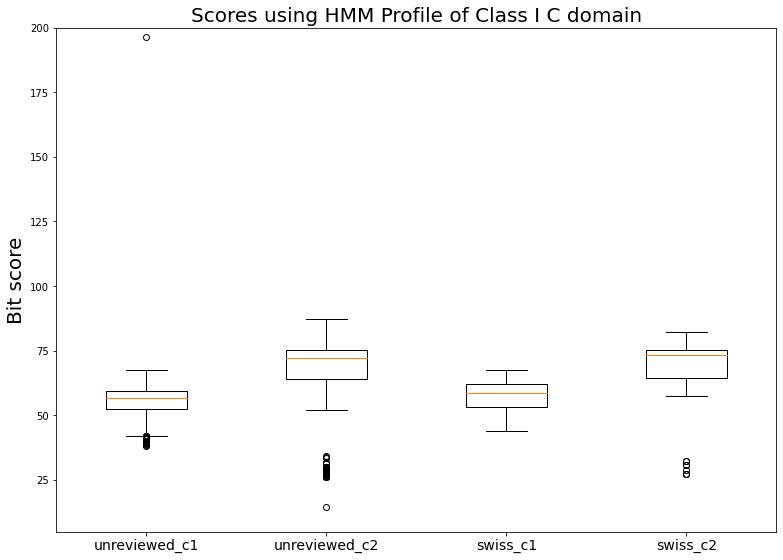

In [30]:
data = [unreviewed_c1_bit_scores, unreviewed_c2_bit_scores, swiss_c1_bit_scores, swiss_c2_bit_scores]

fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data, labels=['unreviewed_c1', 'unreviewed_c2', 'swiss_c1','swiss_c2'])
plt.xticks(fontsize=14)
plt.ylim(top=200)
# show plot
plt.ylabel('Bit score', size=20)
plt.title('Scores using HMM Profile of Class I C domain', size=20)
plt.show()
